# Upper Confidence Bound

### Introduction

In Reinforcement learning, the agent or decision-maker generates its training data by interacting with the world. The agent must learn the consequences of its actions through trial and error, rather than being explicitly told the correct action

### Multi-Armed Bandit Problem

In Reinforcement Learning, we use Multi-Armed Bandit Problem to formalize the notion of decision-making under uncertainty using k-armed bandits. A decision-maker or agent is present in Multi-Armed Bandit Problem to choose between k-different actions and receives a reward based on the action it chooses. Bandit problem is used to describe fundamental concepts in reinforcement learning, such as rewards, timesteps, and values.

We will try to understand UCB as simple as possible. Consider there are 5 bandits or slot machines namely B1, B2, B3, B4 and B5.

Given the 5 machines, using UCB we are going to devise a sequence of playing the machines in a way to maximize the yield or rewards from the machines.

Given below are the intuitive steps behind UCB for maximizing the rewards in a MABP:

Step 1: Each machine is assumed to have a uniform Confidence Interval and a success distribution. This Confidence Interval is a margin of success rate distributions which is the most certain to consist of the actual success rate distribution of each machine which we are unaware of in the beginning.

Step 2: A machine is randomly chosen to play, as initially, they have all the same confidence Intervals.

Step 3: Based on whether the machine gave a reward or not, the Confidence Interval shifts either towards or away from the actual success distribution and the also converges or shrinks as it has been explored thus resulting in the Upper bound value of the confidence Interval to also be reduced.

Step 4: Based on the current Upper Confidence bounds of each of the machines, the one with the highest is chosen to explore in the next round.

Step 5: Steps 3 and 4 are continued until there are sufficient observations to determine the upper confidence bound of each machine. The one with the highest upper confidence bound is the machine with the highest success rate.

### UCB Algorithm

![UCB ALGORITHM](ucbalgo.png)

## Importing the Libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the Dataset

In [20]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [21]:
print(dataset)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
5        1     1     0     0     0     0     0     0     0      0
6        0     0     0     1     0     0     0     0     0      0
7        1     1     0     0     1     0     0     0     0      0
8        0     0     0     0     0     0     0     0     0      0
9        0     0     1     0     0     0     0     0     0      0
10       0     0     0     0     0     0     0     0     0      0
11       0     0     0     0     0     0     0     0     0      0
12       0     0     0     1     0     0     0     0     0      0
13       0     0     0     0     0     0     0     0     1      0
14       0

## Implementing UCB

First of all we declare the initial variables as follows:

    N = total number of users or obseervations(no. of rows)

    d = total number of adds(no. of columns)

    ads_selected = list of all the ads selected for all users or observation while iterating for all users

    number_of_selection($N_{i}(n)$) = list containg ads selected for a specific user(1 if ad selected else 0)

    sum_of_rewards($R_{i}(n)$) = list containg reward for specific user based on ad selected by him

    total_reward = total reward of ad after being selected for all users




Now we iterate through all the users(rows) via iterator n and at each iteration we set the ad to first ad and max_upper_bound at first ad to zero.


Now for each user(row) we iterate through ads(columns) via iterator i and for each iteration if the ad is selected then we do this:
                            
      1. calculate the average reward upto that ad for ith user according to algorithm (STEP 2 OF ALGO)
      2. calculate delta_i upto that ad for ith user according to algorithm (STEP 2 OF ALGO)
      3. calculate upper bound upto that ad for ith user according to algorithm (STEP 3 OF ALGO)
      

If the add not selected(else case) then we do:
          
     we compulsorly select the add by specifying the upper_bound for such add too high, clost to infinity value which is
     1e400
       

And in last if condition:
    
    we update the max_upper_bound after calculating the upper_bound if the add selected and if not and also select that
    ith ad by changing the ad index to i. (STEP 3 OF ALGO) 
    

After calculating the upper bound of each ad selected or not selected by each user now we update our list of:
    
    ads_selected with the ad which was selected i.e ad at index ad
    
    number_of_selections are updated with 1 to indicate that particular ad was selected
    
    now reward according to datasest or real data for that particular user and particular selected ad is stored 
    in reward variable
    
    now sum_of_rewards is updated with new reward value added to it
    
    at last total_reward is calcualted with new reward value added to it
      

In [22]:
import math

N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0

    for i in range(0, d):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

## Visualizing the results

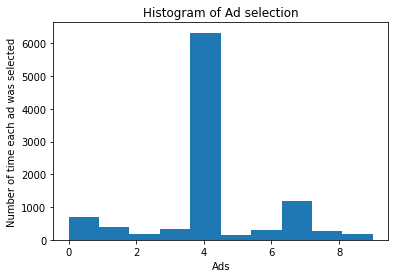

In [23]:
plt.hist(ads_selected)
plt.title('Histogram of Ad selection')
plt.xlabel('Ads')
plt.ylabel('Number of time each ad was selected')
plt.show()

The optimal number of rounds needed to find the corect ad we can try playing with value of N. 

After playing around we found that for this particular case UCB was able to find correct add from 500 value of N thus we can set N to that and this reduces looping from 10000 to 500 and saves lot of computation!